<h1>What Is Data Visualization?</h1>
<hr>
<h3>“The representation of information in the form of a chart, diagram, picture, etc.”</h3>

<h6>
Use a simple bar chart showing the number of accidents per year (2019–2022) to illustrate how raw numbers become instantly understandable when visualized.
</h6>

In [3]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
df = pd.read_csv('datasets\\uk_accident_data.csv')

In [4]:
# Step 1: Convert to string only if not null
df['Accident Date'] = df['Accident Date'].astype(str)
# Step 2: Replace '/' with '-' safely
df['Accident Date'] = df['Accident Date'].replace('/', '-') 
# Step 3: Strip whitespace
df['Accident Date'] = df['Accident Date'].str.strip() #remove whitespace 
# Step 4: Convert to datetime
df['Accident Date'] = pd.to_datetime(df['Accident Date'], dayfirst=True, errors='coerce')


df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mode()[0])
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mode()[0])
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna('unaccounted')
df['Road_Type'] = df['Road_Type'].fillna('unaccounted')
df['Weather_Conditions'] = df['Weather_Conditions'].fillna('unaccounted_weather_condition')
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].fillna('unknown_area')
df.dtypes
df.isnull().sum()

df['Year'] = df['Accident Date'].dt.year
df['Month'] =  df['Accident Date'].dt.month
df['Day'] =  df['Accident Date'].dt.day
df['DayOfWeek'] =  df['Accident Date'].dt.dayofweek
df.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

# LOC (.loc) function in Pandas 
<hr>

The <b>loc</b> function in Pandas is a powerful attribute used to access or modify rows and columns in a DataFrame based on labels or boolean conditions. It is primarily label-based, meaning it works with the row and column labels rather than their integer positions.

Key Features of loc:
Access by Label:
You can select rows and columns using their labels.
Example: df.loc['row_label', 'column_label']
Access Multiple Rows/Columns:

Use lists or slices of labels to select multiple rows or columns.
Example: df.loc[['row1', 'row2'], ['col1', 'col2']]
Boolean Indexing:

You can filter rows based on a condition.
Example: df.loc[df['column'] > 10]

# Syntax of loc
data_frame.loc[row, column]

if multiple rows 
data_frame.loc[[row1, row2], column]

if multiple columns
data_frame.loc[row, [column1, column2]]

In [11]:
df.loc[[4,6,7], ['Accident_Severity'] == 'Fatal']

,Accident_Severity
4,Slight
6,Serious
7,Fatal


In [13]:
df.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
Year                                int32
Month                               int32
Day                                 int32
DayOfWeek                           int32
dtype: object

# ISIN (.isin()) FUNCTION
<hr>
The <b>isin</b> function in Pandas is a powerful method used to filter data in a DataFrame or Series by checking whether each element is present in a specified list, set, or other iterable. It is commonly used to create boolean masks for filtering rows or columns based on specific criteria.<br>

<b>Key Features of isin:</b> <br>
<b>Purpose:</b> Checks if elements in a DataFrame or Series are contained in a given set of values.<br>
<b>Output:</b> Returns a DataFrame or Series of boolean values (True or False), where True indicates that the element is in the specified set.<br><br>
<b>Syntax: </b> <br>
DataFrame.isin(values)
values: Can be a list, set, dictionary, Series, or DataFrame. It specifies the values to check against.

In [16]:
df[df['Light_Conditions'].isin(['Daylight'])]

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
5,200701BS67159,Serious,2019-09-18,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,9,18,2
6,200701BS67207,Serious,2019-09-05,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019,9,5,3
9,200701BS67543,Slight,2019-10-18,51.484539,Daylight,Kensington and Chelsea,-0.175651,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 125cc and up to 500cc,2019,10,18,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660672,201091NM01085,Serious,2022-01-29,57.170725,Daylight,Highland,-3.852421,1,2,Snow,Single carriageway,Rural,Fine no high winds,Car,2022,1,29,5
660673,201091NM01190,Slight,2022-02-02,57.585152,Daylight,Highland,-3.748312,2,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2022,2,2,2
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2


<h2>Replacing Day using LOC</h2>
<h4>To Replace 'Day' Column instead of just numbers to replace it with 'Week Day' and 'Weekend', by referring to 'Day of Week' if the Number
is 4, 5, 6 Friday to Sunday</h4>

In [17]:
# FIRST: Assume ALL days are Weekdays
df['Day'] = 'Weekday'
# SECOND: Change ONLY Saturday (5) and Sunday (6) to Weekend
df.loc[df['DayOfWeek'].isin([4, 5, 6]), 'Day'] = 'Weekend'

In [18]:
df['Day'].value_counts()

Day
Weekday    366299
Weekend    294380
Name: count, dtype: int64

# PIVOT TABLE 
<hr>
<p>Pivoting tables in Pandas is a powerful way to reshape and summarize data, especially when working with scraped datasets. Below is a step-by-step guide to pivoting tables using Pandas.</p>

## Syntax
### pd.pivot_table(data, values='ColumnToAggregate', index='RowCategory', columns='ColumnCategory', aggfunc='function')

In [27]:
pivot = pd.pivot_table(df, 
                       values='Index', 
                       index='Road_Type', 
                       columns='Year', 
                       aggfunc='count')
pivot

Year,2019,2020,2021,2022
Road_Type,,,,
Dual carriageway,28162,25795,24052,21415
One way street,3813,3549,3271,2926
Roundabout,11698,11365,11041,9888
Single carriageway,134898,126633,122573,108039
Slip road,1974,1833,1698,1536
unaccounted,1570,1416,919,615


<h4>** NOTE -> Before Changing Data Type Make sure you have already filled the Null Values, Other wise it would result to an error</h4>

In [6]:
df['Index'] = df['Index'].astype('str')
df['Accident_Severity'] = df['Accident_Severity'].astype('category')
df['Light_Conditions'] = df['Light_Conditions'].astype('category')
df['District Area'] = df['District Area'].astype('category')
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].astype('category')
df['Road_Type'] = df['Road_Type'].astype('category')
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].astype('category')
df['Weather_Conditions'] = df['Weather_Conditions'].astype('category')
df['Vehicle_Type'] = df['Vehicle_Type'].astype('category')
df['Day'] = df['Day'].astype('category')

In [8]:
#df.to_csv('uk_accident_cleaned.csv',index=False)

<Axes: xlabel='Year'>

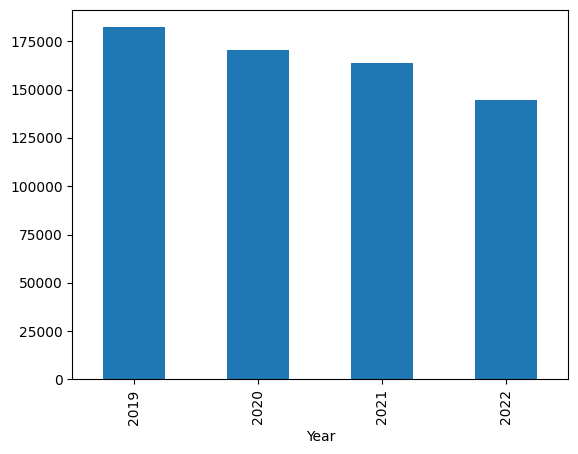

In [9]:
# Example: Bar chart of accident counts per year
import matplotlib.pyplot as plt
df.groupby('Year')['Index'].count().plot(kind='bar')

<h1>Why Is It Important?</h1>
<ul>
    <li><h4>Helps identify patterns, trends, and outliers.</h4> </li>
    <li><h4>Speeds up decision-making.</h4></li>
    <li><h4>Makes data accessible to non-technical stakeholders.</h4></li>
</ul>

<h4>
📊 Example Visualization: Line chart showing monthly accident trends over time. This reveals seasonal spikes (e.g., winter months, holidays).
</h4>

<table>
<tr>
<th>Visualization Type</th>
<th>UK Dataset Example (Using YOUR Columns)</th>
<th>Purpose</th>
</tr>
<tr>
<td>Histogram</td>
<td>Distribution of <code>Number_of_Casualties</code></td>
<td>Show how many accidents have 1, 2, 3+ casualties (most have 1)</td>
</tr>
<tr>
<td>Heatmap</td>
<td>Accidents by <code>Month</code> vs. <code>DayOfWeek</code></td>
<td>Reveal seasonal patterns and weekday/weekend differences</td>
</tr>
<tr>
<td>Box Plot</td>
<td><code>Number_of_Casualties</code> by <code>Urban_or_Rural_Area</code></td>
<td>Compare casualty severity between urban and rural areas</td>
</tr>
<tr>
<td>Pie Chart</td>
<td>Proportions of <code>Accident_Severity</code> (Slight/Serious/Fatal)</td>
<td>Show that ~90% of accidents are "Slight" (surprising insight!)</td>
</tr>
<tr>
<td>Stacked Bar Chart</td>
<td><code>Road_Type</code> vs. <code>Accident_Severity</code></td>
<td>Compare which road types have higher proportions of serious/fatal accidents</td>
</tr>
</table>

<h1>Univariate Plotting </h1>
<h2>Focus on one variable at a time.</h2>

<h4>📌 Example: Histogram of vehicle types involved </h4>


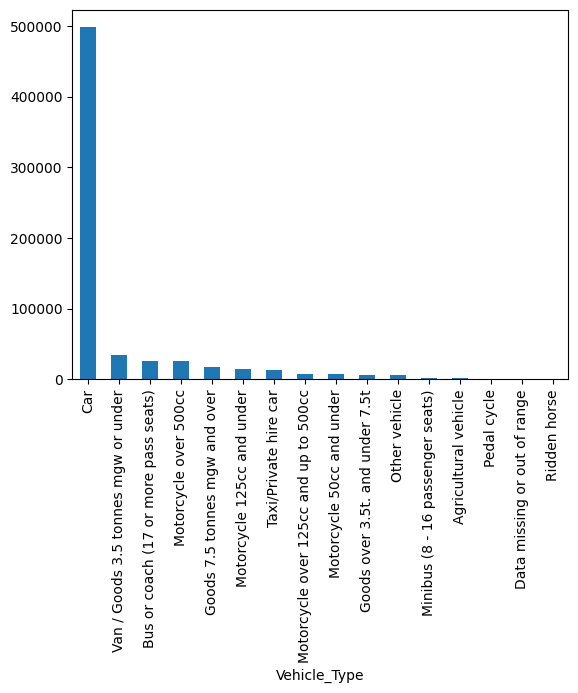

In [10]:

df['Vehicle_Type'].value_counts().plot(kind='bar')
plt.show()

In [11]:
nocar_df = df[df['Vehicle_Type'] != 'Car']
# nocar_df

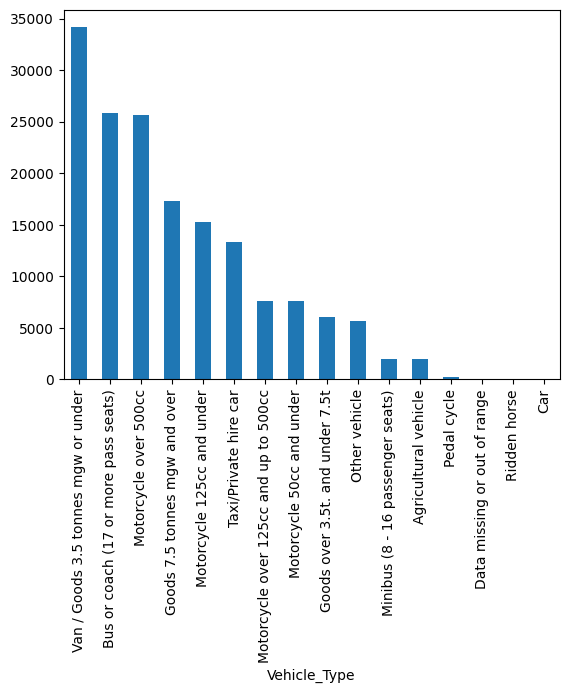

In [12]:
nocar_df['Vehicle_Type'].value_counts().plot(kind='bar')
plt.show()

<h1> <i>A Data Analysis Journey: From National Trends to Local Insights </i></h1>

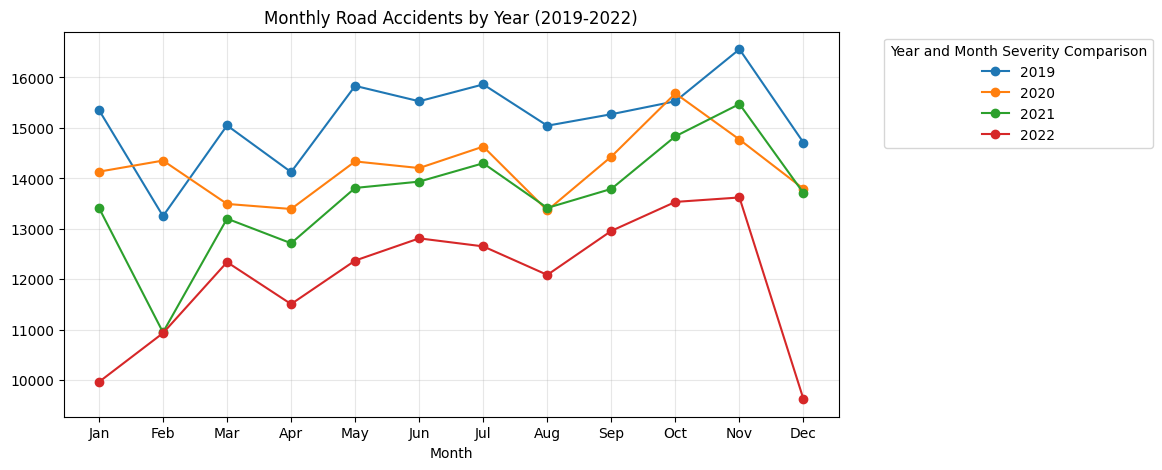

In [13]:
import matplotlib.pyplot as plt

# 1. Group by Year FIRST, then Month (critical order!)
monthly_data = df.groupby(['Year', 'Month']).size()

# 2. Unstack Year to create separate lines for each year
monthly_data = monthly_data.unstack(level=0)

# 3. Plot with clean formatting (only 4 lines!)
monthly_data.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Year and Month Severity Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h1>Correlational Analysis</h1>
<hr>

<h3>Numeric Values Correlation </h3>

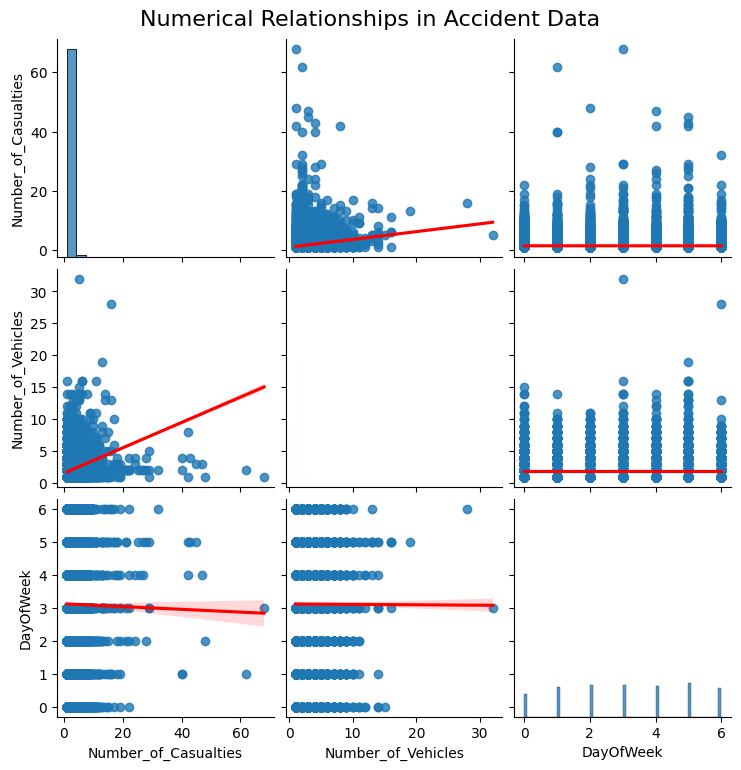

In [14]:
sns.pairplot(
    df[['Number_of_Casualties', 'Number_of_Vehicles', 'DayOfWeek']],
    kind='reg',  
    plot_kws={'line_kws': {'color': 'red'}}  # Makes trend lines red
)
plt.suptitle('Numerical Relationships in Accident Data', y=1.02, fontsize=16)
plt.show()

<h3>Categorical Data Correlational Analysis </h3>
<hr>

In [30]:
# Create a copy to avoid changing original data
corr_df = df.copy()

# Convert Accident_Severity to numerical (1=Slight, 2=Serious, 3=Fatal)
severity_map = {'Slight': 1, 'Serious': 2, 'Fatal': 3}
corr_df['Severity_Num'] = corr_df['Accident_Severity'].map(severity_map)

# Convert Urban_or_Rural_Area to numerical (1=Urban, 0=Rural)
area_map = {'Urban': 1, 'Rural': 0}
corr_df['Area_Num'] = corr_df['Urban_or_Rural_Area'].map(area_map)

# Convert Weather_Conditions to risk level (simplified)
weather_map = {
    'Fine no high winds': 1,
    'Raining no high winds': 2,
    'Snowing no high winds': 3,
    'Fog or mist': 2,
    'Other': 2
}
corr_df['Weather_Risk'] = corr_df['Weather_Conditions'].map(weather_map).fillna(1)

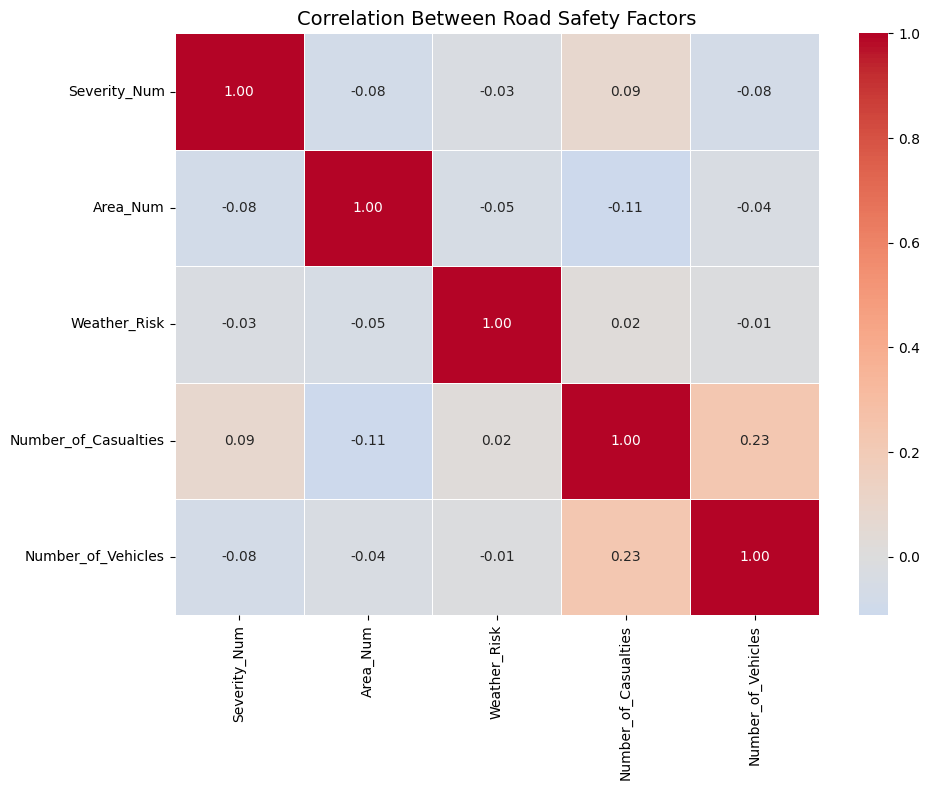

In [31]:
# Calculate correlations between our numerical variables
correlation_matrix = corr_df[['Severity_Num', 'Area_Num', 'Weather_Risk', 
                             'Number_of_Casualties', 'Number_of_Vehicles']].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,        # Show correlation values
    fmt=".2f",         # Format to 2 decimal places
    cmap='coolwarm',   # Blue=negative, Red=positive
    center=0,          # Center at 0 correlation
    linewidths=0.5
)

plt.title('Correlation Between Road Safety Factors', fontsize=14)
plt.tight_layout()
plt.show()

<h2><i>Seasonal Analysis </i></h2>

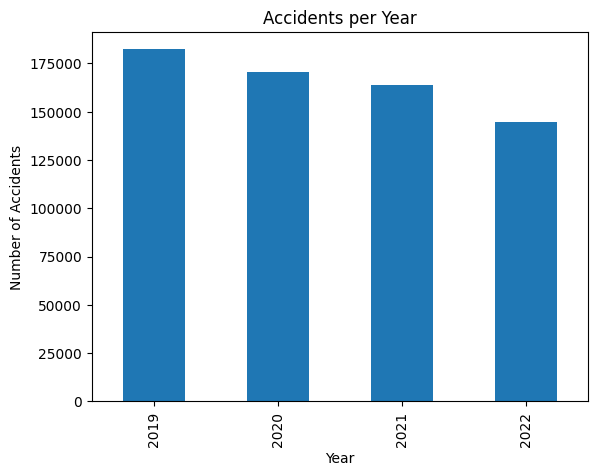

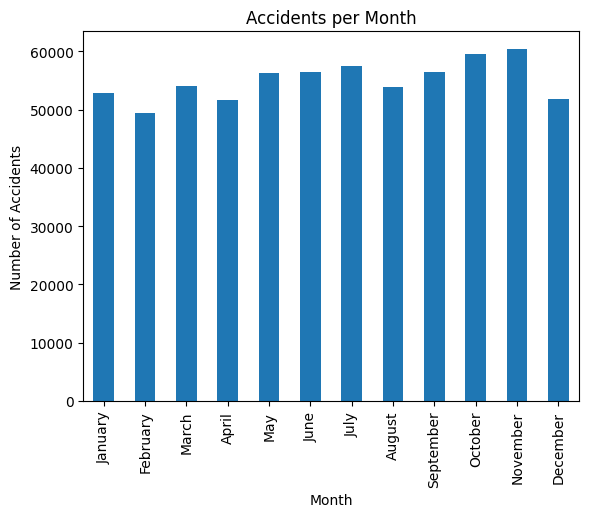

DayOfWeek
Monday        72680
Tuesday       94550
Wednesday     99558
Thursday      99511
Friday        97900
Saturday     107178
Sunday        89302
Name: count, dtype: int64


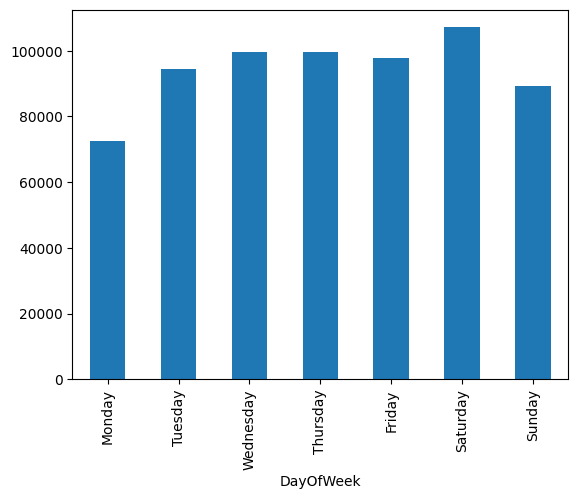

In [19]:
# Accidents per year
accidents_per_year = df['Year'].value_counts().sort_index()
accidents_per_month = df['Month'].value_counts().sort_index()
accidents_per_day = df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h3>Accident Severity </h3>

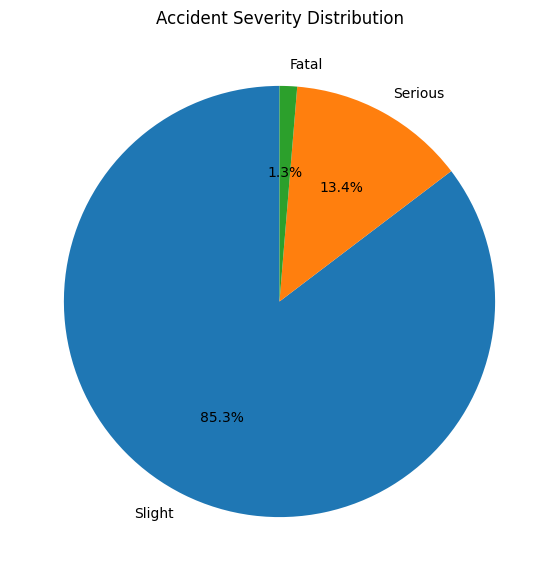

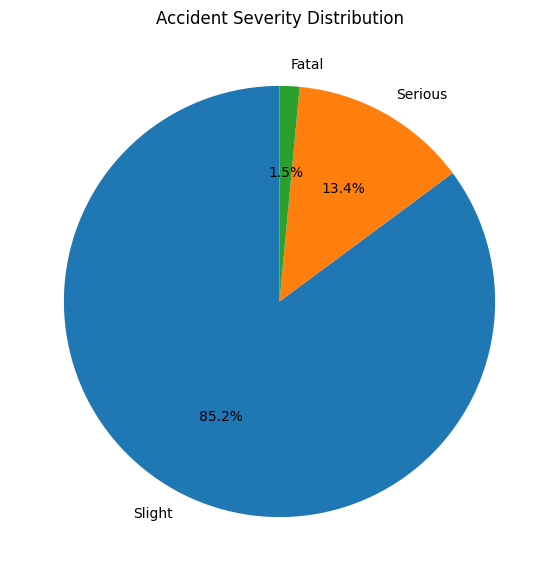

In [20]:
severity_counts = df['Accident_Severity'].value_counts()

plt.pie(severity_counts,
        labels = severity_counts.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019 = df[df['Year'] == 2019]
# severity_2019
sc_2019 = severity_2019['Accident_Severity'].value_counts()

plt.pie(sc_2019,
        labels = sc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


<h1>TASK STUDENT TO SELECT 6 to 7 DISTRICT AMONGST THE DISTRICT AREA AND APPLY SPECIFIC ANALYSIS </h1>

<h1>Using District Area to make a comparison to a general result </h1>
<h3>London Analysis</h3>
<hr>
<br>
<img src='https://images.pexels.com/photos/258117/pexels-photo-258117.jpeg?cs=srgb&dl=pexels-pixabay-258117.jpg&fm=jpg'>

In [21]:
# df.dtypes
london_df = df[df['District Area'] == 'City of London']

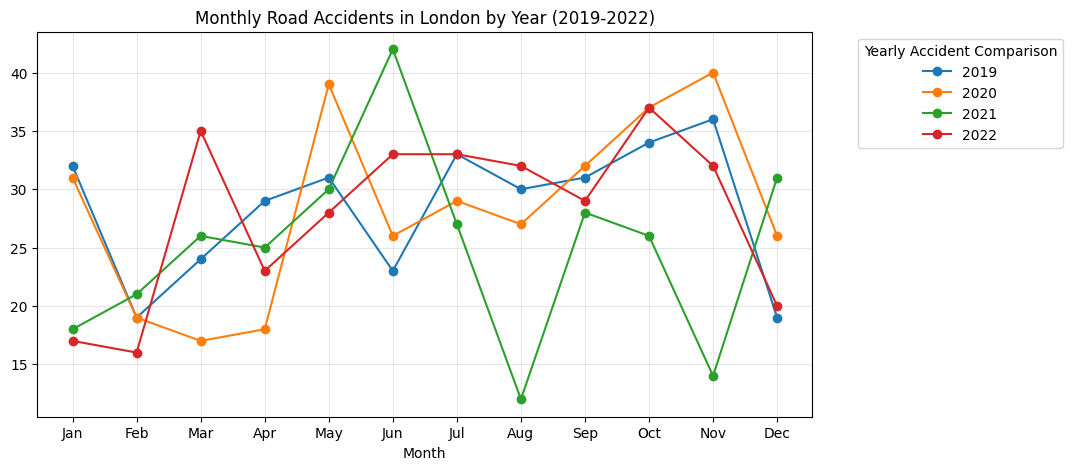

In [22]:
monthly_londondata = london_df.groupby(['Year', 'Month']).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in London by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

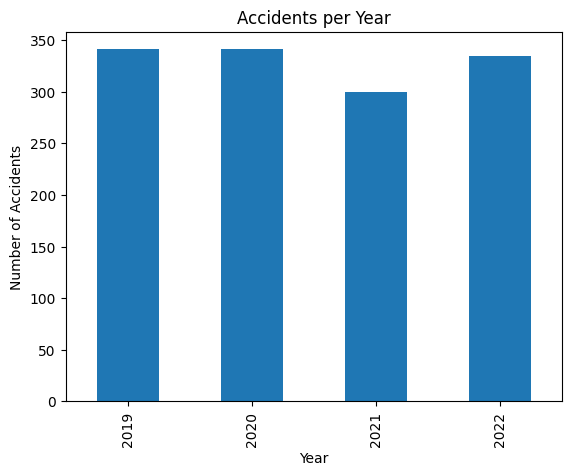

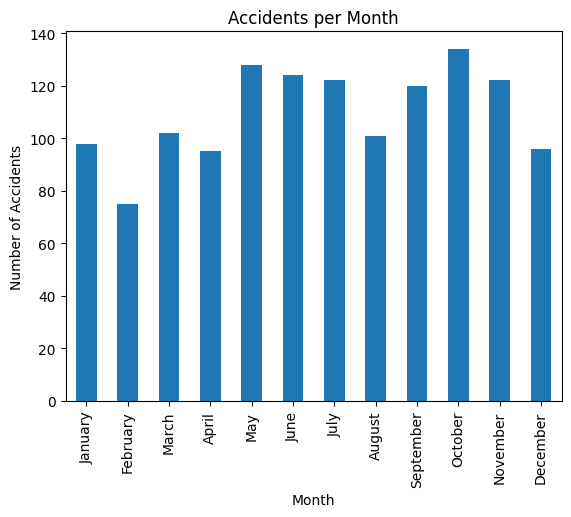

DayOfWeek
Monday        65
Tuesday      198
Wednesday    245
Thursday     244
Friday       249
Saturday     236
Sunday        80
Name: count, dtype: int64


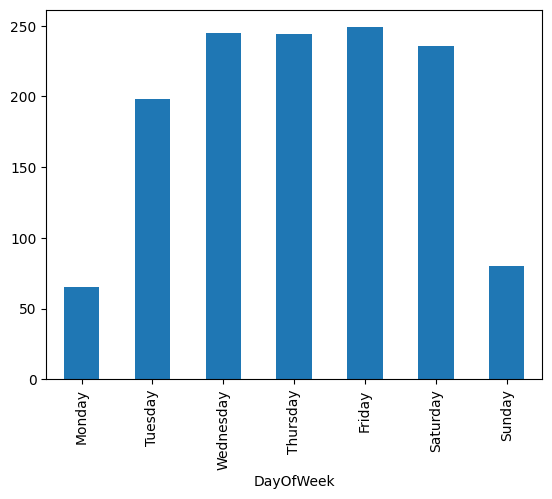

In [23]:
# Accidents per year
accidents_per_year = london_df['Year'].value_counts().sort_index()
accidents_per_month = london_df['Month'].value_counts().sort_index()
accidents_per_day = london_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<h4><i>Accident Severity in London</i></h4>

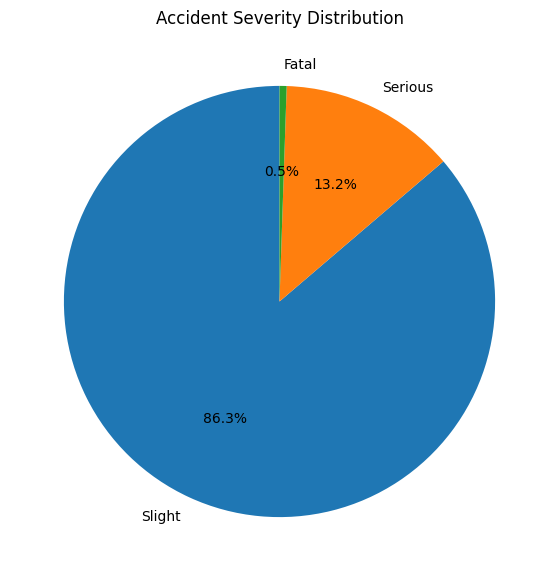

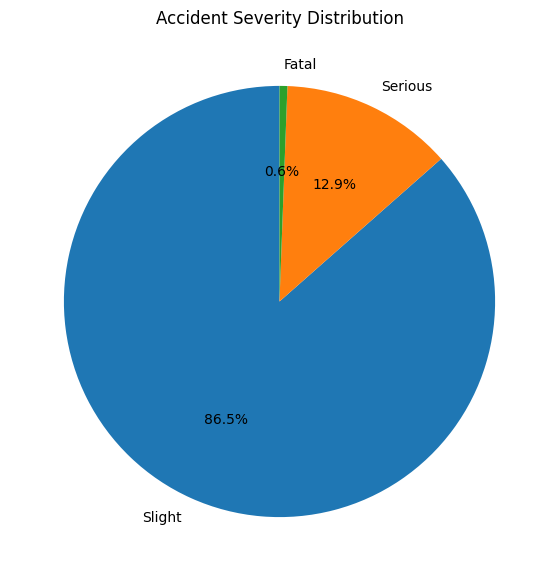

In [41]:
severity_london  = london_df['Accident_Severity'].value_counts()

plt.pie(severity_london,
        labels = severity_london.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2019_london = london_df[london_df['Year'] == 2019]
# severity_2019
lsc_2019 = severity_2019_london['Accident_Severity'].value_counts()

plt.pie(lsc_2019,
        labels = lsc_2019.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


In [19]:
london_df = df[df['District Area']== 'City of London']

In [20]:
#london_df.dtypes
london_fatal = london_df[london_df['Accident_Severity'] == 'Fatal']

In [21]:
import folium
from folium.plugins import HeatMap

locations  = list(zip(london_fatal['Latitude'],london_fatal['Longitude']))

m = folium.Map(location=[london_fatal['Latitude'].mean(), london_fatal['Longitude'].mean()], zoom_start=10)

# Step 3: Add the heatmap layer
HeatMap(locations).add_to(m)

# Step 4: Save or display the map
m.save('accident_heatmap.html')  # Save the map as an HTML file
m  # Display the map in a Jupyter Notebook

In [ ]:
locations

<br>
<br>
<hr>
<br>
<h1>DATA VISUALIZATIONS WITH SEABORN</h1>
<hr>
<br>
<p> Seaborn for Road Safety: Visualizing UK Accident Data
A Beginne Guide to Seabornmns.</p>

# # 🚦 **Seaborn for Road Safety: Visualizing UK Accident Data**
<b> Now that we've covered mastered Matplotlib basics (bar/pie/line charts), 
Seaborn is your next step toward **professional-quality visualizations** with less code.
<ul>
    <li>Why Seaborn makes statistical visualization EASIER than Matplotlib</li>
    <li>How to create 5 powerful safety-focused plots in 5 lines of code</li>
    <li>When to use Seaborn vs Matplotlib (they work together!)</li>
    <li>Real insights from UK road accident patterns</li>
</ul>
<strong>**Pro Tip**: Seaborn is built ON TOP of Matplotlib - it's not a replacement!</strong>

<h1>Count Plot </h1>
<hr>
<p>Only require an X argument and then it will count the value based on the data provided</p>

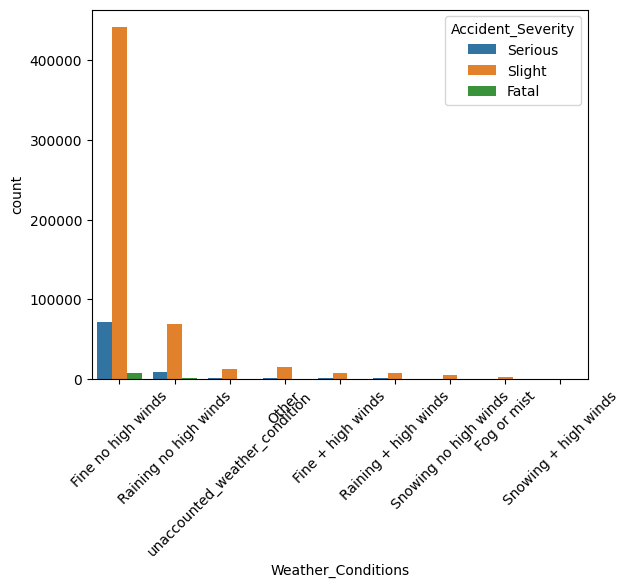

In [24]:
sns.countplot(
    x='Weather_Conditions',
    hue='Accident_Severity',
    data=df
)
plt.xticks(rotation=45)
plt.show()

<h1> Bar Plot </h1>

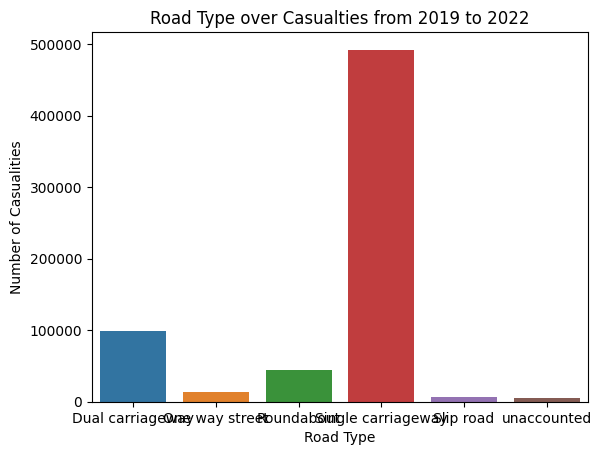

In [25]:
road_type_casualties = df.groupby(['Road_Type'])['Number_of_Casualties'].size().reset_index() #unstasck() / reset_index / pivot_table
road_type_casualties

sns.barplot(data=road_type_casualties, x='Road_Type', y='Number_of_Casualties', hue='Road_Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Casualities')
plt.title('Road Type over Casualties from 2019 to 2022')
plt.show()

<h1>Violin Plot </h1>
<h4>Violin Plot and Box Plot are used mainly for checking the average of data</h4>

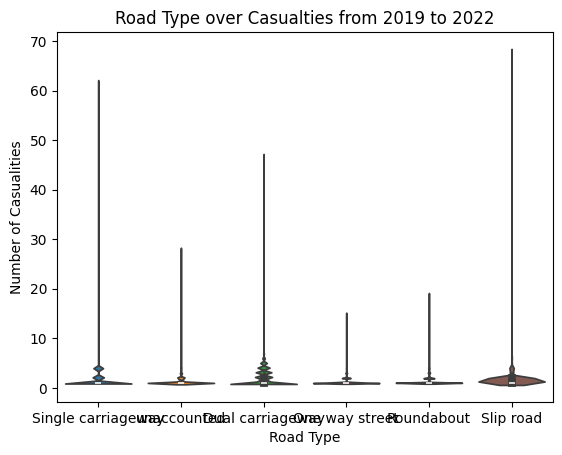

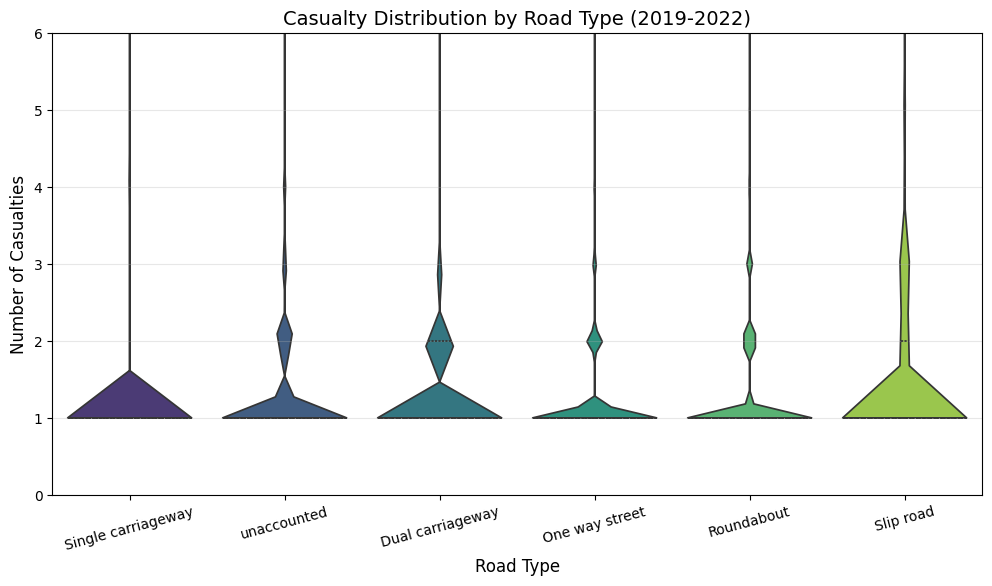

In [47]:


sns.violinplot(data=df, x='Road_Type', y='Number_of_Casualties', hue='Road_Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Casualities')
plt.title('Road Type over Casualties from 2019 to 2022')
plt.show()


# %% [code]
plt.figure(figsize=(12, 6))

# CORRECTED VIOLIN PLOT (no redundant hue!)
sns.violinplot(
    x='Road_Type',
    y='Number_of_Casualties',
    data=df,
    inner="quart",  # Shows median and IQR (better than full box)
    cut=0,          # Trims to actual data range (critical for skewed data!)
    scale="width",  # Makes all violins same width for fair comparison
    palette="viridis"
)

# ADD THESE CRITICAL FORMATTING LINES:
plt.ylim(0, 6)  # Focus on MOST COMMON range (0-6 casualties)
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.3)
plt.title('Casualty Distribution by Road Type (2019-2022)', fontsize=14)
plt.xlabel('Road Type', fontsize=12)
plt.ylabel('Number of Casualties', fontsize=12)
plt.show()

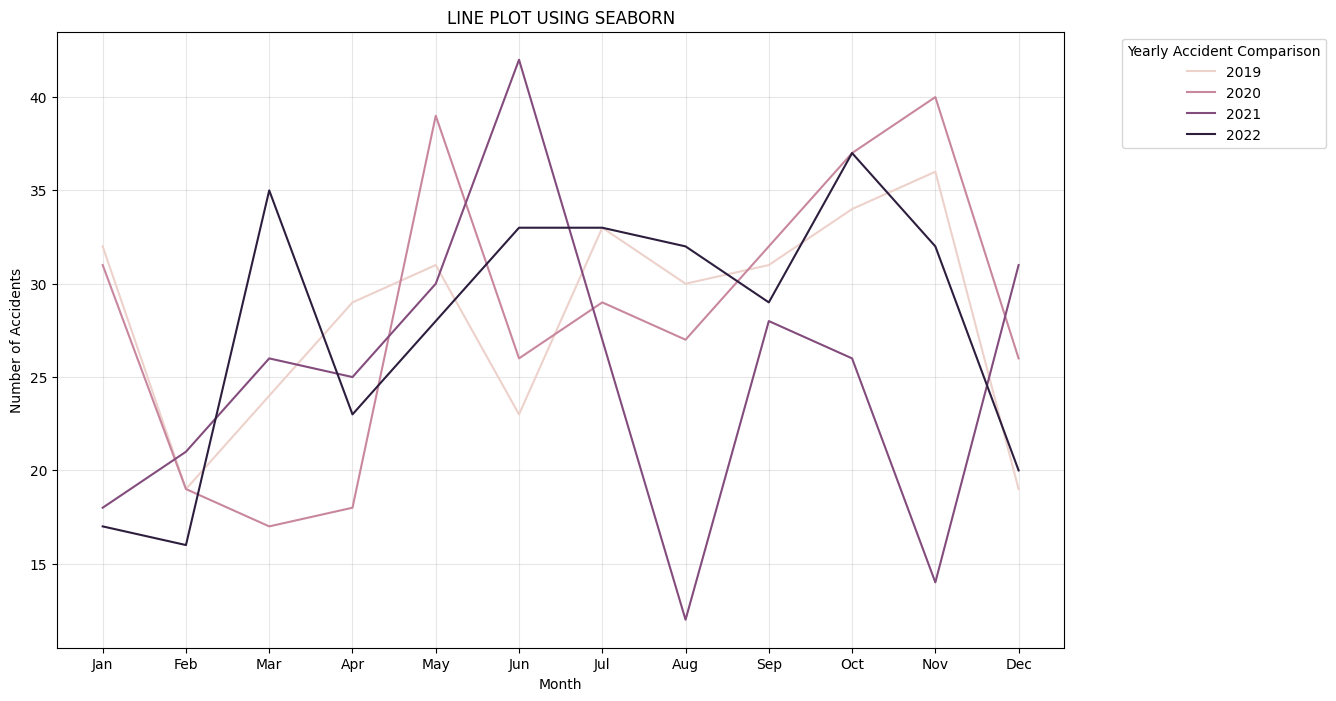

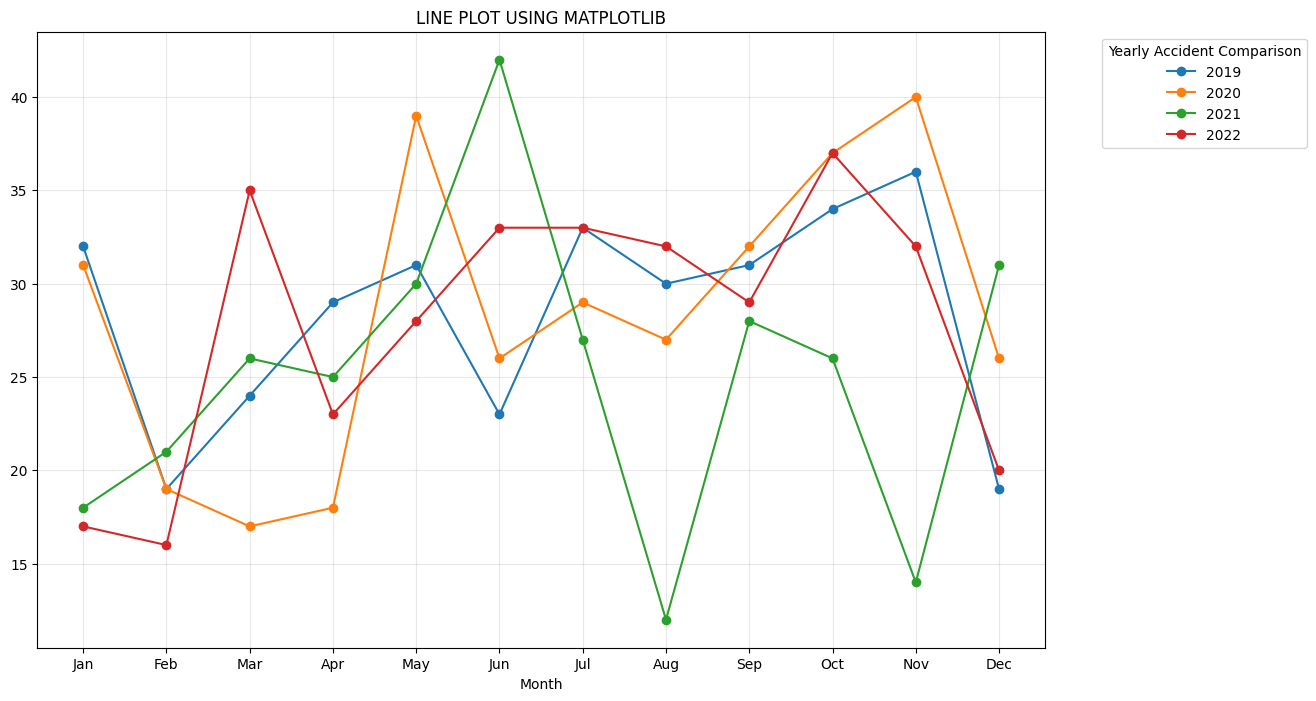

In [45]:
monthly_londondata = london_df.groupby(['Year', 'Month']).size().reset_index(name = 'Number of Accidents')
monthly_londondata

sns.lineplot(data=monthly_londondata, x = 'Month', y = 'Number of Accidents',hue='Year')
  
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.gcf().set_size_inches(13,8)
plt.title('LINE PLOT USING SEABORN')
plt.show()

#another example a shortcut version

mm2 = london_df.groupby(['Year', 'Month']).size().unstack(level=0).plot(marker='o')

plt.title('LINE PLOT USING MATPLOTLIB')  
plt.gcf().set_size_inches(13,8)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h1>VISUALIZATION USING PIVOT TABLE </h1>

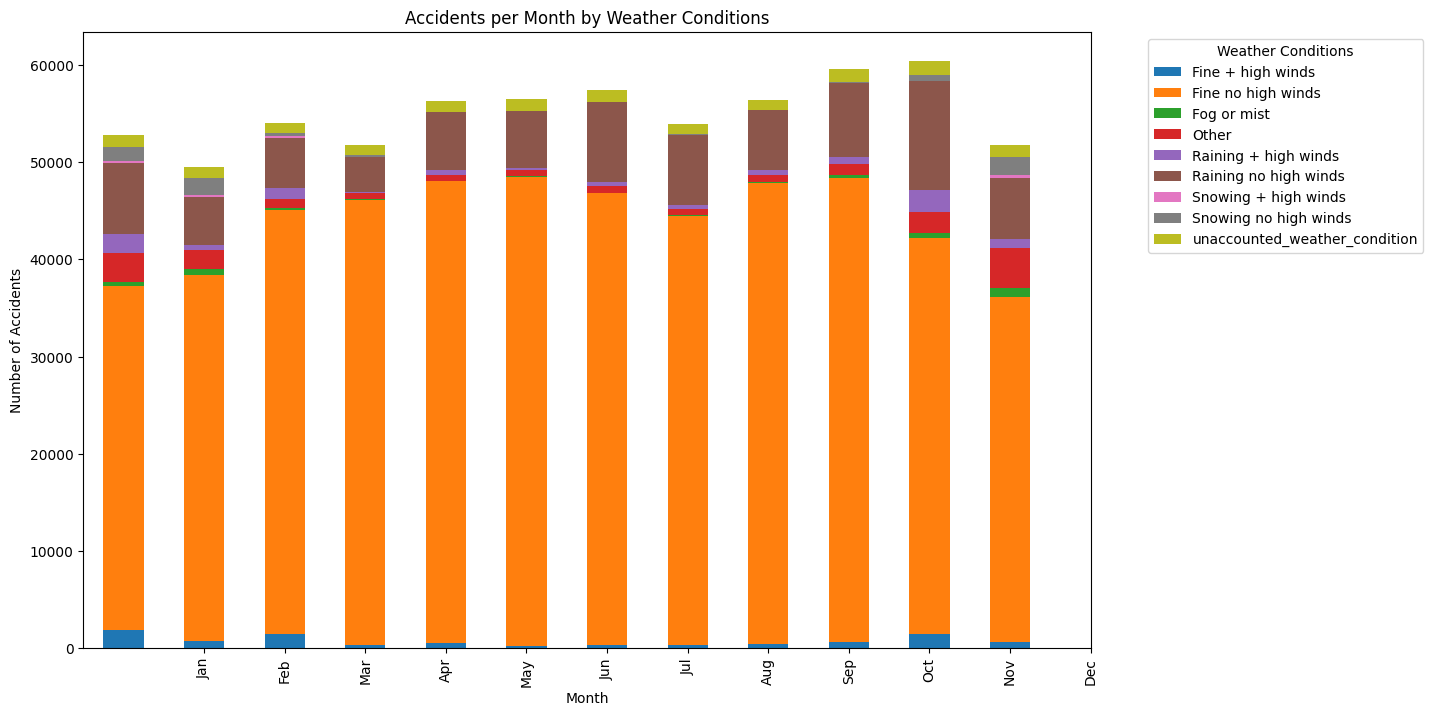

In [46]:
# Pivot table for accidents by month and weather conditions
accidents_by_month_weather = df.pivot_table(index='Month', columns='Weather_Conditions', values='Index', aggfunc='count')

accidents_by_month_weather.plot(kind='bar', stacked=True)
plt.title('Accidents per Month by Weather Conditions')
plt.xlabel('Month')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Number of Accidents')
plt.gcf().set_size_inches(13,8)
plt.show()


<h1>Additional Visualizations 

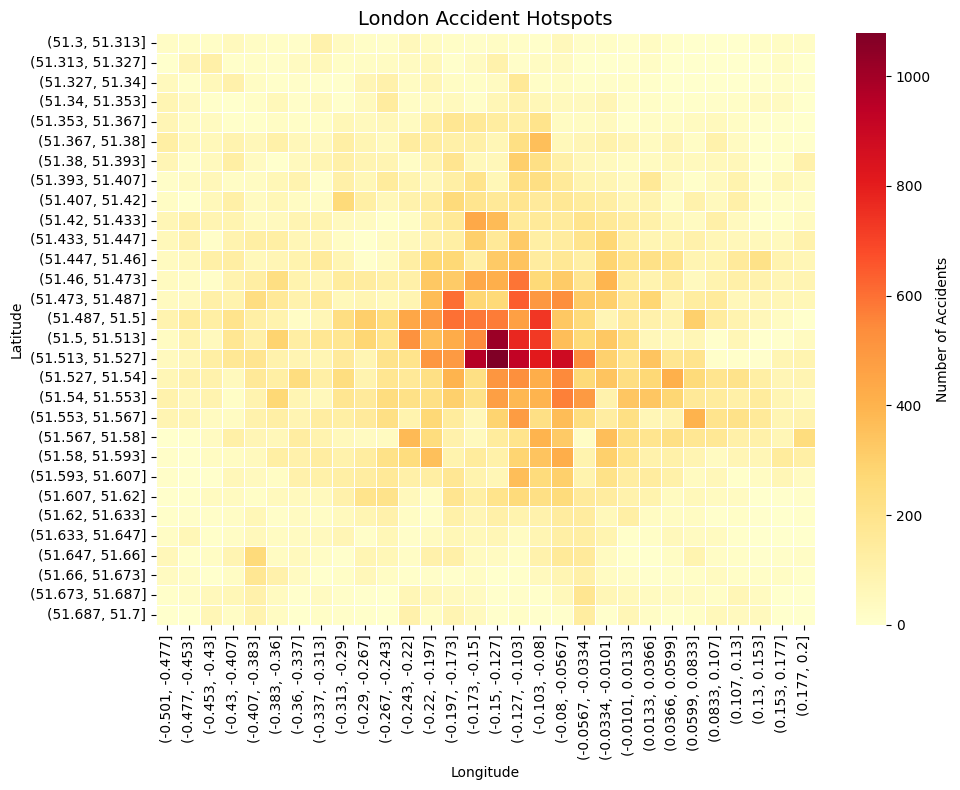

In [29]:
# Focus on a smaller area for clearer results (London example)
london_df = df[(df['Latitude'] > 51.3) & (df['Latitude'] < 51.7) & 
               (df['Longitude'] > -0.5) & (df['Longitude'] < 0.2)]

# Create grid for heatmap
heatmap_data = london_df.groupby(
    [pd.cut(london_df['Latitude'], 30), 
     pd.cut(london_df['Longitude'], 30)]
).size().unstack()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",
    linewidths=0.5,
    cbar_kws={'label': 'Number of Accidents'}
)

# Add labels
plt.title('London Accident Hotspots', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()